<a href="https://colab.research.google.com/github/pankajroy97/OIBSIP/blob/main/SALES_PREDICTION_USING_PYTHON(OIBSIP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Load our dataset
df=pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


###Lets get some statistical from dataset

In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

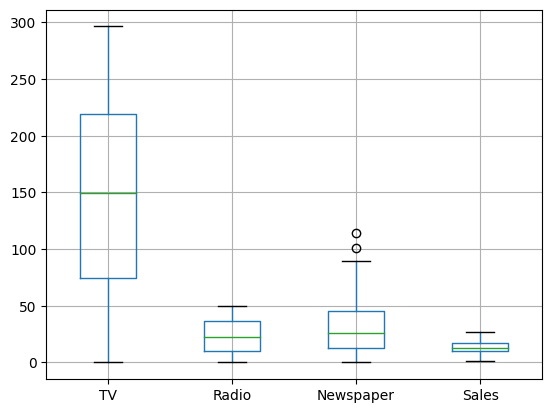

In [ ]:
df.boxplot()

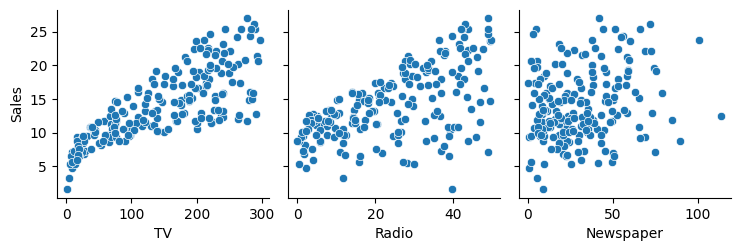

In [ ]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

###From above graph chart we see that TV vs Sales plotted linear y=mx+c,so we can build model in linear regression algorithm should be get acurate prediction value

<Axes: >

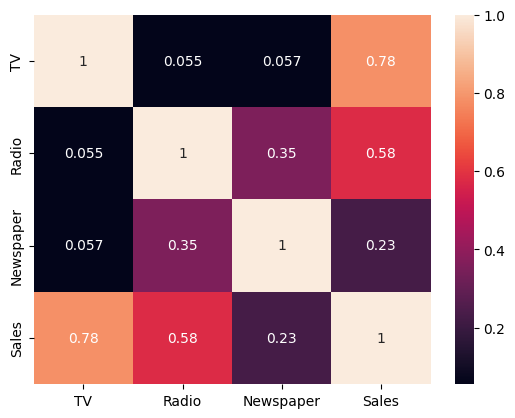

In [ ]:
correlation=df.corr()
sns.heatmap(correlation,annot=True)

In [ ]:
x=df['TV']
y=df['Sales']

In [ ]:
x.shape

(200,)

In [ ]:
y.shape

(200,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(140,)
(140,)


###Build Linear Model

In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_sm=sm.add_constant(x_train)
#Fit The Regression line using OLS
line=sm.OLS(x_train,x_train_sm).fit()

In [ ]:
line.params

const    4.374279e-14
TV       1.000000e+00
dtype: float64

In [ ]:
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.371e+33
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:39:24   Log-Likelihood:                 4163.6
No. Observations:                 140   AIC:                            -8323.
Df Residuals:                     138   BIC:                            -8317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.374e-14   4.71e-15      9.292      0.000    3.44e-14    5.31e-14
TV             1.0000    2.7e-17    3.7e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       31.581   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.144
Skew:                           1.307   Prob(JB):                     2.60e-10
Kurtosis:                       3.858   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Looking at some key statistics from the summary

1.R - squared is 1.00(100%)
Meaning that 100% of the variance in Sales is explained by TV

This is a Very Good R-squared value.

2.p value is very low that(<0.5) that mean our model is very good.

###Build Linear Model by another linear regression algorithm

In [ ]:
#Split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [ ]:
#Try to reshape trainning dataset to -1 to 1 values 
x_train=x_train.values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
model=lm.fit(x_train,y_train)
model_predict=model.predict(x_train)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train,model_predict)*100

61.343124694299945

In [ ]:
x_test=x_test.values.reshape(-1,1)

In [ ]:
model1=lm.fit(x_test,y_test)
model_predict1=model1.predict(x_test)
model_predict1

array([ 7.18984273, 19.26665931, 13.86773523, 18.19211617, 19.4501179 ,
       17.62077372, 14.07740219, 17.13853972, 18.12397441, 18.14494111,
       12.92423394, 18.81063369,  9.72681288, 16.62485569, 11.35173178,
       11.71864895, 14.62777794, 15.70232108, 15.35112894, 12.69884196,
       18.03486595, 13.56371815, 17.0232229 , 16.05875491, 16.47284714,
       18.32839969, 18.30219132, 10.72797259, 16.47284714, 13.23349269,
       10.36629709, 10.39774713, 13.12341754, 16.65630573,  9.4018291 ,
       13.09720917, 11.87589916, 15.60797096, 18.43847484, 16.90790607,
       18.07155767, 15.99061315, 15.40354567, 18.23404956, 13.08148415,
       11.48277362,  7.66683505, 19.82227674, 10.48161392,  8.78331158,
       17.39538174, 15.7599795 , 10.71748924, 13.6528266 , 17.825199  ,
        9.11353704,  7.68256007,  8.12286068, 17.13853972, 11.27310667])

In [ ]:
print("Accuracy score of test data",r2_score(y_test,model_predict1)*100)

Accuracy score of test data 62.391139180042934


###SUPPORT VECTOR METHOD

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df['Sales in Category']=df['Sales'].copy()

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales,Sales in Category
0,230.1,37.8,69.2,22.1,22.1
1,44.5,39.3,45.1,10.4,10.4
2,17.2,45.9,69.3,9.3,9.3
3,151.5,41.3,58.5,18.5,18.5
4,180.8,10.8,58.4,12.9,12.9


In [ ]:
def condition(x):
  if x<10:
    return 'less than 10'
  elif 10<x<20:
    return 'Between 10 to 20' 
  else:
    return 'more than 20'

In [ ]:
df['Sales in Category']=df['Sales in Category'].apply(condition)

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales,Sales in Category
0,230.1,37.8,69.2,22.1,more than 20
1,44.5,39.3,45.1,10.4,Between 10 to 20
2,17.2,45.9,69.3,9.3,less than 10
3,151.5,41.3,58.5,18.5,Between 10 to 20
4,180.8,10.8,58.4,12.9,Between 10 to 20


In [ ]:
x1=df[['TV','Radio','Newspaper']]
y1=df['Sales in Category']

In [ ]:
from sklearn.model_selection import train_test_split
x1_train_svm,x1_test_svm,y1_train_svm,y1_test_svm= train_test_split(x1, y1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
print(x1_train_svm.shape)
print(y1_train_svm.shape)
print(x1_test_svm.shape)
print(y1_test_svm.shape)

(140, 3)
(140,)
(60, 3)
(60,)


In [ ]:
y1_train_svm.head()

74     Between 10 to 20
3      Between 10 to 20
185        more than 20
26     Between 10 to 20
90     Between 10 to 20
Name: Sales in Category, dtype: object

In [ ]:
from sklearn.svm import SVC
lr=SVC()
model_train=lr.fit(x1_train_svm,y1_train_svm)
model_train_predict=model_train.predict(x1_train_svm)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy of tranning data',accuracy_score(y1_train_svm,model_train_predict)*100)

Accuracy of tranning data 87.85714285714286


In [ ]:
model_test=lr.fit(x1_test_svm,y1_test_svm)
model_test_predict=model_test.predict(x1_test_svm)

In [ ]:
print('Accuracy of tranning data',accuracy_score(y1_test_svm,model_test_predict)*100)

Accuracy of tranning data 83.33333333333334


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,r2_score
cm=confusion_matrix(y1_test_svm,model_test_predict)
cr=classification_report(y1_test_svm,model_test_predict)
print(cm)
print(cr)

[[42  1  0]
 [ 2  8  0]
 [ 7  0  0]]
                  precision    recall  f1-score   support

Between 10 to 20       0.82      0.98      0.89        43
    less than 10       0.89      0.80      0.84        10
    more than 20       0.00      0.00      0.00         7

        accuracy                           0.83        60
       macro avg       0.57      0.59      0.58        60
    weighted avg       0.74      0.83      0.78        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
x1_test_svm['original sales']=y1_test_svm
x1_test_svm['Prediction sales']=model_test_predict
x1_test_svm.head()

,TV,Radio,Newspaper,original sales,Prediction sales
126,7.8,38.9,50.6,less than 10,less than 10
104,238.2,34.3,5.3,more than 20,Between 10 to 20
99,135.2,41.7,45.9,Between 10 to 20,Between 10 to 20
92,217.7,33.5,59.0,Between 10 to 20,Between 10 to 20
111,241.7,38.0,23.2,more than 20,Between 10 to 20


###KNN Regression Model

In [ ]:
#Selecting independent and dependent variable
x_knn=df[['TV','Radio','Newspaper']]
y_knn=df['Sales']

In [ ]:
# Separating the data into tranning and testing
from sklearn.model_selection import train_test_split
x_train_knn,x_test_knn,y_train_knn,y_test_knn= train_test_split(x_knn, y_knn, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
print(x_train_knn.shape)
print(y_train_knn.shape)
print(x_test_knn.shape)
print(y_test_knn.shape)

(140, 3)
(140,)
(60, 3)
(60,)


In [ ]:
#import libraries
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#k=4
knn=KNeighborsRegressor(n_neighbors=4)
model_knn=knn.fit(x_train_knn,y_train_knn)
model_train_knn=model_knn.predict(x_train_knn)
from sklearn.metrics import r2_score
print("Accuracy score=",r2_score(y_train_knn,model_train_knn)*100)

Accuracy score= 95.1367668180145


In [ ]:
#k=1
knn=KNeighborsRegressor(n_neighbors=1)
model_knn=knn.fit(x_train_knn,y_train_knn)
model_train_knn=model_knn.predict(x_train_knn)
print("Accuracy score=",r2_score(y_train_knn,model_train_knn)*100)

Accuracy score= 100.0


From above we can conclude that K = 1 has best accuracy among the various K value we have considered

In [ ]:
knn=KNeighborsRegressor(n_neighbors=1)
model_knn=knn.fit(x_test_knn,y_test_knn)
model_test_knn=model_knn.predict(x_test_knn)
print("Accuracy score of test data=",r2_score(y_test_knn,model_test_knn)*100)

Accuracy score of test data= 100.0


In [ ]:
model_test_knn

array([ 6.6, 20.7, 17.2, 19.4, 21.8, 12.2, 12.2, 11.7, 22.6, 22.3, 11.9,
       19.7,  8.7, 15.6, 10.6,  9.7, 17.3, 11.7, 18. , 11.9, 17.4, 11. ,
       22.4, 17.1, 15.5, 24.7, 19.6, 11.3, 20.7, 15.2, 13.6,  9.3, 11.6,
       14.9,  8.4, 14.2,  9.6, 11.7, 11.5, 15.2, 17.1, 14.1, 14.5, 12.2,
       13.2, 10.6,  8.7, 18.9, 10.5,  7.6, 16.6, 19. , 12.6, 18. , 18.4,
       10.4,  5.9,  9.5, 16.6, 13.3])

In [ ]:
x_test_knn['original sales']=y_test_knn
x_test_knn['Prediction test']=model_test_knn
x_test_knn.head()

,TV,Radio,Newspaper,original sales,Prediction test
126,7.8,38.9,50.6,6.6,6.6
104,238.2,34.3,5.3,20.7,20.7
99,135.2,41.7,45.9,17.2,17.2
92,217.7,33.5,59.0,19.4,19.4
111,241.7,38.0,23.2,21.8,21.8


###Final Conclusion: KNN method is best algorithm for prediction this dataset which gives you 100% accuracy and currect prediction.